## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
num_mice = pd.unique(merged_data['Mouse ID'])
#len(num_mice)
len(merged_data['Mouse ID'])

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data[merged_data.duplicated(['Mouse ID','Timepoint'])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

g989 = merged_data[merged_data['Mouse ID'] == 'g989']
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(mouse_df['Mouse ID'])

1888

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = mouse_df.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = drug_group['Tumor Volume (mm3)'].mean()
drug_median = drug_group['Tumor Volume (mm3)'].median()
drug_var = drug_group['Tumor Volume (mm3)'].var()
drug_SD = drug_group['Tumor Volume (mm3)'].std()
drug_SEM = drug_group['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
tumorvolume_summary = pd.DataFrame(data={'Mean Tumor Volume (mm3)': drug_mean,'Median Tumor Volume (mm3)': drug_median,'Variance': drug_var,'Standard Deviation': drug_SD,'SEM': drug_SEM})
tumorvolume_summary

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumorvolume_summary
# Using the aggregation method, produce the same summary statistics in a single line


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Measurements for each Drug Regimen')

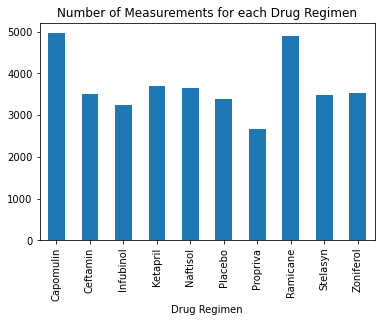

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_sum = drug_group['Timepoint'].sum()
timepoint_plot = drug_sum.plot(kind='bar')
plt.title('Number of Measurements for each Drug Regimen')


Text(0, 0.5, 'Number of Measurements')

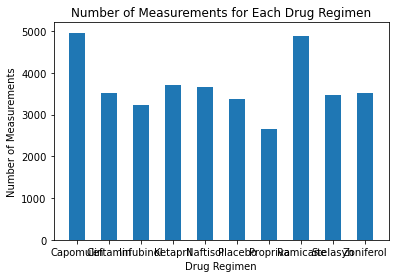

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = list(tumorvolume_summary.index.values)

plt.bar(x_axis, drug_sum,width=.5, align='center')
plt.title('Number of Measurements for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')

<AxesSubplot:ylabel='Mouse ID'>

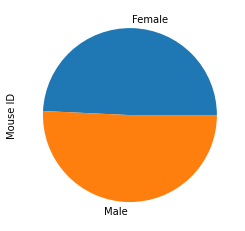

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_group = mouse_df.groupby(['Sex'])
sex_sum = sex_group['Mouse ID'].count()
sex_plot = sex_sum.plot(kind='pie')
sex_plot

Text(0.5, 1.0, 'Male to Female Distribution')

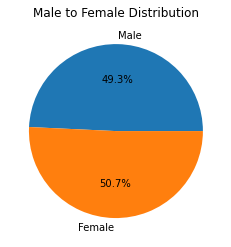

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
plt.pie(sex_sum, labels=labels, autopct="%1.1f%%")
plt.title('Male to Female Distribution')


## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
filter_df = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Capomulin') | (mouse_df['Drug Regimen'] == 'Ramicane' ) | (mouse_df['Drug Regimen'] == 'Infubinol') | (mouse_df['Drug Regimen'] == 'Ceftamin')]
filter_df = filter_df.sort_values(['Drug Regimen', 'Mouse ID', 'Timepoint'], ascending=True)
filter_df = filter_df.reset_index(drop=True)

ID_group = filter_df.groupby(['Mouse ID'])
last_measure = ID_group['Timepoint'].max()
merged_df = pd.merge(filter_df, last_measure, on='Mouse ID')
merged_df = merged_df.loc[(merged_df['Timepoint_x'] == merged_df['Timepoint_y'])]
merged_df.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
9,b128,Capomulin,Female,9,22,45,38.982878,2,45
19,b742,Capomulin,Male,7,21,45,38.939633,0,45
24,f966,Capomulin,Male,16,17,20,30.485985,0,20
34,g288,Capomulin,Male,3,19,45,37.074024,1,45
44,g316,Capomulin,Female,22,22,45,40.159220,2,45


In [53]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = merged_df['Tumor Volume (mm3)']
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = merged_df[(merged_df['Tumor Volume (mm3)'] < lower_bound) | (merged_df['Tumor Volume (mm3)'] > upper_bound)]


In [54]:
    # Locate the rows which contain mice on each drug and get the tumor volumes

     

    for x in Treatments:
        drug_tumor_vol = merged_df.loc[(merged_df['Drug Regimen'] == x),'Tumor Volume (mm3)']
        tumor_vol_list.append(drug_tumor_vol)
        quartiles = drug_tumor_vol.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        outliers = drug_tumor_vol.loc[(drug_tumor_vol < lower_bound) | (drug_tumor_vol > upper_bound)]
        print(x, outliers)
        
    



Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 456    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


([<matplotlib.axis.XTick at 0x1f212b46c40>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

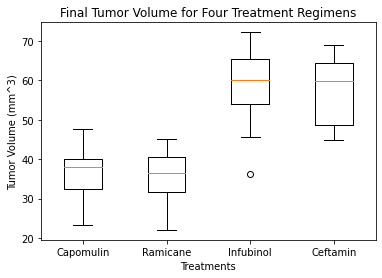

In [59]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Four Treatment Regimens')
ax1.boxplot(tumor_vol_list)
ax1.set_ylabel('Tumor Volume (mm^3)')
ax1.set_xlabel('Treatments')
plt.xticks([1, 2, 3, 4], Treatments)

## Line and Scatter Plots

(0.0, 45.0)

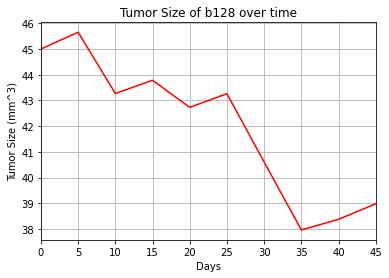

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
b128 = mouse_df[mouse_df['Mouse ID'] == 'b128'][['Tumor Volume (mm3)','Timepoint']]
plt.plot(b128['Timepoint'],b128['Tumor Volume (mm3)'], color='red')
plt.grid()
plt.title('Tumor Size of b128 over time')
plt.xlabel('Days')
plt.ylabel('Tumor Size (mm^3)')
plt.xticks([0,5,10,15,20,25,30,35,40,45])
plt.xlim(0,45)

Text(0.5, 1.0, 'Final Mouse Weight vs. Tumor Volume')

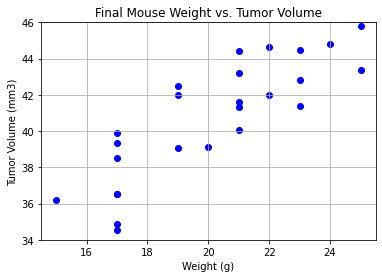

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_1 = mouse_df[mouse_df['Drug Regimen'] == 'Capomulin'][['Mouse ID','Weight (g)','Tumor Volume (mm3)']]
Capomulin_group = Capomulin_1.groupby(['Mouse ID'])
Capomulin_avg = Capomulin_group.mean()
plt.scatter(Capomulin_avg['Weight (g)'], Capomulin_avg['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.ylim(34,46)
plt.title('Final Mouse Weight vs. Tumor Volume')

## Correlation and Regression

The correlation between both factors is 0.84


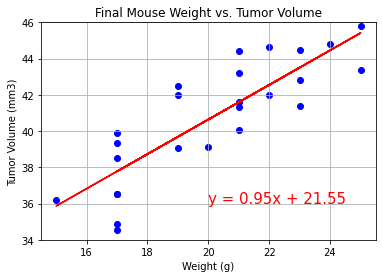

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
pearsonr = st.pearsonr(Capomulin_avg['Weight (g)'],Capomulin_avg['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(pearsonr[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Capomulin_avg['Weight (g)'],Capomulin_avg['Tumor Volume (mm3)'])
regress_values = Capomulin_avg['Weight (g)'] * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Capomulin_avg['Weight (g)'], Capomulin_avg['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.ylim(34,46)
plt.title('Final Mouse Weight vs. Tumor Volume')
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.plot(Capomulin_avg['Weight (g)'],regress_values,"r-")